### 1. Import and Clean data

In [186]:
# import packages
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install statsmodels
# !{sys.executable} -m pip install datetime

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [187]:
# try change
import pandas as pd
import numpy as np
from sklearn import preprocessing

import seaborn as sb

import statsmodels.api as sm
from sklearn.metrics import r2_score
%matplotlib inline

#data = pd.read_pickle('player_stats_year_wise.pkl')
data1516 = pd.read_pickle('tfa_working_ver_1_2015-16')
data1617 = pd.read_pickle('tfa_working_ver_1_2016-17')
data1718 = pd.read_pickle('tfa_working_ver_1')
data1819 = pd.read_pickle('tfa_working_ver_1_2018-19')
data1516

,player_rank,player,pos,age,games,games_started,min_per_game,field_goals,field_goals_attempts,field_goals_pct,...,turnovers,personal_fouls,points_per_game,year,salary,team_id,new_pos,team_points,team,team_rank
0,62,aaron brooks,PG,31,69,0,16.1,2.7,6.8,0.401,...,1.2,1.9,7.1,2016,2000000.0,CHI,back,0.512,Chicago Bulls,15
1,159,aaron gordon,PF,20,78,37,23.9,3.5,7.4,0.473,...,0.8,2.0,9.2,2016,4171680.0,ORL,front,0.427,Orlando Magic,20
2,185,aaron harrison,SG,21,21,0,4.4,0.2,0.9,0.263,...,0.2,0.5,0.9,2016,525093.0,CHO,back,0.585,Charlotte Hornets,10
3,349,adreian payne,PF,24,52,2,9.3,1.0,2.8,0.366,...,0.7,1.5,2.5,2016,1938840.0,MIN,front,0.354,Minnesota Timberwolves,26
4,207,al horford,C,29,82,82,32.1,6.5,12.8,0.505,...,1.3,2.0,15.2,2016,12000000.0,ATL,front,0.585,Atlanta Hawks,8
5,222,al jefferson,C,31,47,18,23.3,5.2,10.7,0.485,...,0.7,2.5,12.0,2016,13833333.0,CHO,front,0.585,Charlotte Hornets,10
6,14,alan anderson,SG,33,13,0,14.8,1.6,4.5,0.356,...,0.2,1.9,5.0,2016,4000000.0,WAS,back,0.500,Washington Wizards,18
7,457,alan williams,PF,23,10,0,6.8,1.0,2.4,0.417,...,0.6,1.5,2.9,2016,114285.0,PHO,front,0.280,Phoenix Suns,27
8,70,alec burks,SG,24,31,3,25.7,4.4,10.8,0.410,...,1.6,2.3,13.3,2016,9213484.0,UTA,back,0.488,Utah Jazz,19
9,262,alex len,C,22,78,46,23.3,3.4,8.0,0.423,...,1.9,2.9,9.0,2016,3807120.0,PHO,front,0.280,Phoenix Suns,27


In [188]:
def data_clean(data):
    df = data.set_index(data.iloc[:,1]).drop(columns = 'player')
    ori_factors = df.loc[:,['games', 'games_started','min_per_game','field_goals','field_goals_pct','3points','3points_pct','2points','2points_pct', 'efg_pct','free_throws','free_throws_pct','trb','assists', 'steals', 'blocks', 'turnovers', 'personal_fouls','points_per_game', 'team_points']].dropna()
    factors = pd.DataFrame(preprocessing.scale(ori_factors))
    factors.columns = ori_factors.columns
    factors.index = ori_factors.index
    return factors

def salary_clean(data):
    df = data.set_index(data.iloc[:,1]).drop(columns = 'player').dropna()
    salary = df.ix[:]['salary']
    salary = pd.DataFrame(preprocessing.scale(salary))
    salary.index = df.index
    return salary, df.ix[:]['salary']

# get next season salary increase or decrease
def salary_change(next_salary, salary):
    df = pd.concat([next_salary, salary],axis = 1).dropna()
    change = df.iloc[:,0] - df.iloc[:,1]
    return change

In [189]:
factors1516 = data_clean(data1516)
factors1617 = data_clean(data1617)
factors1718 = data_clean(data1718)
factors1819 = data_clean(data1819)

(salary1516, ori_salary1516) = salary_clean(data1516)
(salary1617, ori_salary1617) = salary_clean(data1617)
(salary1718, ori_salary1718) = salary_clean(data1718)

orisalary_change1617 = salary_change(ori_salary1617, ori_salary1516)
orisalary_change1718 = salary_change(ori_salary1718, ori_salary1617)

salary_change1617 = salary_change(salary1617, salary1516)
salary_change1718 = salary_change(salary1718, salary1617)
# salary_delta18
factors1718

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label b

,games,games_started,min_per_game,field_goals,field_goals_pct,3points,3points_pct,2points,2points_pct,efg_pct,free_throws,free_throws_pct,trb,assists,steals,blocks,turnovers,personal_fouls,points_per_game,team_points
player,,,,,,,,,,,,,,,,,,,,
aaron brooks,-1.219021,-0.958340,-1.863683,-1.238253,-0.613962,-0.826848,0.315900,-1.165397,-0.646027,-0.371548,-0.908707,-0.224760,-1.388625,-0.844684,-1.187849,-1.065241,-1.168068,-1.326531,-1.223351,0.492214
aaron gordon,-0.021951,0.974543,1.327611,1.395320,-0.221624,1.297717,0.162404,1.085594,-0.006567,-0.159076,0.891105,-0.485125,1.750613,0.101063,0.703461,0.963553,0.680770,0.165224,1.363532,-1.346471
abdel nader,-0.482362,-0.958340,-1.272703,-1.191225,-1.594807,-0.576899,0.307821,-1.109122,-2.257467,-1.479440,-0.758722,-1.454760,-0.964404,-0.900316,-0.951435,-0.558043,-0.675045,-1.326531,-1.104997,1.164569
al horford,0.622625,1.492279,1.173956,0.736927,0.549040,0.422896,0.913726,0.691671,0.210850,0.645284,-0.158785,0.278014,1.538503,1.436235,-0.242194,1.724352,0.680770,0.165224,0.568869,1.164569
al jefferson,-1.034856,-0.958340,-0.977213,-0.203635,1.179583,-1.201771,-2.552049,0.297747,0.556158,0.356928,-0.533746,0.726919,0.096150,-0.733420,-0.715021,0.456355,-0.798301,0.016048,-0.428687,0.574543
alec burks,0.254296,-0.958340,-0.610805,-0.391748,-0.543901,-0.326950,0.122011,-0.377550,-0.582081,-0.659904,0.141183,0.996262,-0.328071,-0.622155,-0.242194,-0.811642,-0.428533,-0.879005,-0.310333,0.574543
alex abrines,0.760748,-0.716730,-0.776279,-0.956085,-0.768094,0.172947,0.517868,-1.221672,-0.697184,0.447988,-0.758722,0.861591,-0.964404,-0.955948,-0.478608,-0.811642,-1.168068,-0.133127,-0.817565,0.574543
alex len,0.484501,-0.544151,-0.173479,-0.203635,1.627970,-1.201771,0.138168,0.297747,0.901467,0.857756,0.591136,-0.610818,1.580925,-0.510891,-0.715021,1.217153,-0.182021,0.761926,-0.175071,-1.682649
alfarouq aminu,0.484501,1.319701,0.984842,-0.109579,-0.768094,1.047768,0.429002,-0.602649,-0.837865,-0.113546,-0.458754,-0.126001,1.623347,-0.510891,0.939875,0.456355,-0.182021,0.314399,-0.039810,0.663733


### 2. Regression Analysis

In [190]:
# factors, salary are operated data

def regression(salary, factors):
    if isinstance(factors, pd.Series): factors = pd.DataFrame(factors)
    
    factor_index = list(factors.columns)
    stat_value = pd.Series(factor_index)

    corr_single_list = []
    t_single_list = []
    rsquare_single_list = []
    
    row = len(factors)
    col = len(factors.columns)
    
    for s in range(col):
        xy = pd.concat([salary, factors.iloc[:,s]], axis=1).dropna()
        # print(salary,factors.iloc[:,s])
        # corr between single x and y
        corr = xy.corr().iloc[0,1]
        y = xy.iloc[:,0]
        x = xy.iloc[:,1]
        beta = sum((x-np.mean(x))*(y-np.mean(y)))/sum((x-np.mean(x))**2) 
        const = np.mean(y)-beta*np.mean(x)          
        # variance  
        var=sum((y-const-beta*x)**2)/(len(y)-2)
        # std. var  
        sigma=np.sqrt(var) 
        # r_square
        rsquare = r2_score(y, (const+beta*x))
        #t-value  
        t=beta*np.sqrt(sum((x-np.mean(x))**2))/sigma
        
        t_single_list.append(t)
        corr_single_list.append(corr)
        rsquare_single_list.append(rsquare)
    
    t_value = pd.Series(t_single_list)        
    corr_value= pd.Series(corr_single_list)
    rsquare_value = pd.Series(rsquare_single_list)

    stat_value = pd.concat([stat_value,t_value, corr_value, rsquare_value],axis = 1)
    stat_value.columns=['factors', 't-value', 'correlation', 'r-square']
    stat_value=stat_value.set_index('factors')
    
    return stat_value, beta, const

In [191]:
# regression between factors and next season's -zscored salary changes(next season's salary is based on this season's factors)
(stat_value1516, beta, const) = regression(salary_change1617, factors1516)
(stat_value1617, beta, const) = regression(salary_change1718, factors1617)
pd.concat([stat_value1516, stat_value1617],axis=1)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/usr/local/lib/python3.6/

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/usr/local/lib/python3.6/

,t-value,correlation,r-square,t-value,correlation,r-square
factors,,,,,,
games,2.192600,0.119473,1.427372e-02,2.255389,0.122843,0.015090
games_started,0.556134,0.030508,9.307135e-04,3.013166,0.163153,0.026619
min_per_game,1.622451,0.088693,7.866389e-03,2.341451,0.127456,0.016245
field_goals,2.120487,0.115597,1.336259e-02,1.519418,0.083100,0.006906
field_goals_pct,0.290492,0.015941,2.541087e-04,1.805891,0.098628,0.009727
3points,2.349706,0.127898,1.635784e-02,2.600496,0.141289,0.019963
3points_pct,1.213594,0.066457,4.416580e-03,0.390796,0.021443,0.000460
2points,1.418632,0.077623,6.025270e-03,0.693043,0.038008,0.001445
2points_pct,0.526313,0.028873,8.336595e-04,2.375991,0.129305,0.016720


### 3. Prediction Analysis (using pre_data)

In [192]:
def t_signal(stat_value):
    t_table = stat_value.iloc[:,0] # fetch t-values

    num = len(t_table)
    t_signal = pd.Series(np.zeros(num), index=t_table.index)

    for i in range(num):
        if t_table[i] >= 1.4: t_signal[i] = 1             # t-value > 0: positive factor，+1
        elif t_table[i] <= -1.4: t_signal[i] = -1        # t-value < 0: negative factor，+1
        else: t_signal[i] = 0
    return t_signal


def final_score(next_factors,factors, t_signal):            
    name_index = list(next_factors.index & factors.index)       # players appear both in 2017 and 2018
    score = []
    for name in name_index:
        delta = next_factors.loc[name] - factors.loc[name]
        score.append(sum(np.sign(delta) * t_signal))
    
    final_score = pd.Series(score, index = name_index)
    return final_score

In [193]:
t_signal1516 = t_signal(stat_value1516)
t_signal1617 = t_signal(stat_value1617)

final_score1516 = final_score(factors1617,factors1516,t_signal1516)
final_score1617 = final_score(factors1718,factors1617,t_signal1516)   # here,suppose the posi & nege info remains to the next year
final_score1718 = final_score(factors1819,factors1718,t_signal1617)
score_table = pd.concat([final_score1718, final_score1617],axis=1).dropna()
score_table.columns = ['2017-18','2016-17']
score_table

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


,2017-18,2016-17
aaron gordon,4.0,4.0
al horford,-4.0,-4.0
alec burks,2.0,2.0
alex abrines,4.0,-4.0
alex len,6.0,-4.0
alfarouq aminu,-4.0,4.0
allen crabbe,-8.0,2.0
amir johnson,-4.0,-6.0
andre drummond,-6.0,0.0
andre iguodala,-8.0,-6.0


In [194]:
# players perform much better than the last year
top = 15 # choose top 15 of them
top_potential = data1516.iloc[:top,:2]
top_potential.columns = ['2017-18','2016-17']

top_potential.iloc[:,0] = final_score1718.nlargest(top).index
top_potential.iloc[:,1] = final_score1617.nlargest(top).index
top_potential

,2017-18,2016-17
0,blake griffin,bobby portis
1,dorian finneysmith,bryn forbes
2,jake layman,caris levert
3,malik beasley,david nwaba
4,malik monk,davis bertans
5,nik stauskas,delon wright
6,zach collins,denzel valentine
7,cody zeller,derrick favors
8,danny green,devin harris
9,derrick rose,dwight powell


In [209]:
# salary prediction in 2018-19
(stat, beta, const) = regression(final_score1617, salary_change1718)
# print(stat, beta, const)
new_delta1819 = const + beta * final_score1718 + abs(min(preprocessing.scale(const + beta * final_score1718)))
new_delta1819[new_delta1819<0]=0
new_salary1819 = (new_delta1819*np.std(ori_salary1718) + ori_salary1718).dropna()

prediction = pd.concat([new_salary1819,ori_salary1718,final_score1718],axis = 1).dropna()
prediction.columns = ['predicted 2018-19 salary','2017-18 salary','2017-18 score']
prediction

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,predicted 2018-19 salary,2017-18 salary,2017-18 score
aaron gordon,1.647198e+07,5504420.0,4.0
al horford,3.084319e+07,27734405.0,-4.0
alec burks,1.984838e+07,10845506.0,2.0
alex abrines,1.669256e+07,5725000.0,4.0
alex len,1.711986e+07,4187599.0,6.0
alfarouq aminu,1.042782e+07,7319035.0,-4.0
alfonzo mckinnie,1.374787e+07,815615.0,6.0
allen crabbe,1.858809e+07,19332500.0,-8.0
amir johnson,1.410879e+07,11000000.0,-4.0
andre drummond,2.491960e+07,23775506.0,-6.0


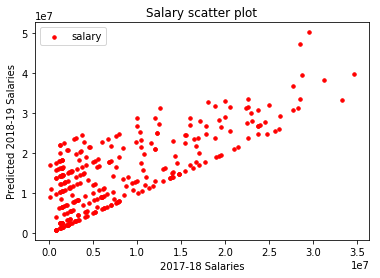

In [208]:
import matplotlib.pyplot as plt
x = prediction.iloc[:,1]  # 2017-18 Salary
y = prediction.iloc[:,0]  # predicted 2018-19 salary
plt.scatter(x,y,label = "salary",color='red',s=12)
# x-axis label 
plt.xlabel('2017-18 Salaries') 
# frequency label 
plt.ylabel('Predicted 2018-19 Salaries') 
# plot title 
plt.title('Salary scatter plot') 
# showing legend 
plt.legend() 